# Raka Satria Efendi

# MC009D5Y0313

# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [2]:
from google.colab import drive
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')

# Path to the dataset in Google Drive
file_path = '/content/drive/MyDrive/e-commerce-dataset/data-ecommerce.csv'

# Load dataset
dataset_ecommerce = pd.read_csv(file_path, encoding="ISO-8859-1")

Mounted at /content/drive


In [3]:
print(f'Jumlah baris dalam dataset: {dataset_ecommerce.shape[0]}')

Jumlah baris dalam dataset: 541909


In [4]:
# Display the first few rows of the dataset
dataset_ecommerce.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

## 1. Memahami Struktur Data

In [5]:
display(dataset_ecommerce.head())
display(dataset_ecommerce.info())

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


None

## 2. Menangani Data yang Hilang

## Check Data Mengandung null, NaN, dan duplicate

In [6]:
# Mengecek jumlah nilai null (NaN) dalam dataset
print("Jumlah nilai null per kolom:")
print(dataset_ecommerce.isnull().sum())

Jumlah nilai null per kolom:
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [7]:
# Hapus baris yang tidak punya CustomerID
dataset_ecommerce = dataset_ecommerce.dropna(subset=['CustomerID'])

# Isi Description yang kosong dengan 'Unknown' (opsional)
dataset_ecommerce.loc[:, 'Description'] = dataset_ecommerce['Description'].fillna('Unknown')

##  3. Analisis Distribusi dan Korelasi

### Statistik Deskriptif:

In [8]:
print(dataset_ecommerce.describe())  # Statistik deskriptif

            Quantity      UnitPrice     CustomerID
count  406829.000000  406829.000000  406829.000000
mean       12.061303       3.460471   15287.690570
std       248.693370      69.315162    1713.600303
min    -80995.000000       0.000000   12346.000000
25%         2.000000       1.250000   13953.000000
50%         5.000000       1.950000   15152.000000
75%        12.000000       3.750000   16791.000000
max     80995.000000   38970.000000   18287.000000


In [9]:
# Cek jumlah transaksi dengan nilai Quantity <= 0 atau UnitPrice <= 0
dataset_ecommerce[(dataset_ecommerce['Quantity'] <= 0) | (dataset_ecommerce['UnitPrice'] <= 0)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/2011 9:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,12/9/2011 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/2011 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/2011 11:58,1.25,17315.0,United Kingdom


In [10]:
# Hapus transaksi dengan Quantity <= 0 atau UnitPrice <= 0
dataset_ecommerce = dataset_ecommerce[(dataset_ecommerce['Quantity'] > 0) & (dataset_ecommerce['UnitPrice'] > 0)]

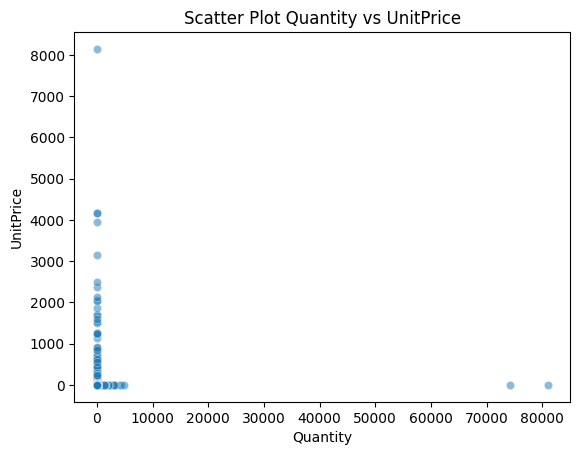

In [11]:
sns.scatterplot(data=dataset_ecommerce, x='Quantity', y='UnitPrice', alpha=0.5)
plt.title('Scatter Plot Quantity vs UnitPrice')
plt.show()

### Korelasi Antar Variabel:

In [12]:
# Ubah CustomerID ke tipe integer (biar bisa dihitung korelasinya)
dataset_ecommerce['CustomerID'] = dataset_ecommerce['CustomerID'].astype(int)

In [13]:
from sklearn.preprocessing import LabelEncoder

# Buat salinan dataset untuk eksperimen
df_corr = dataset_ecommerce.copy()

# Encode kolom 'Country'
label_encoder = LabelEncoder()
df_corr['Country_Encoded'] = label_encoder.fit_transform(df_corr['Country'])

# Cek hasil encoding
df_corr[['Country', 'Country_Encoded']].head()


,Country,Country_Encoded
0,United Kingdom,35
1,United Kingdom,35
2,United Kingdom,35
3,United Kingdom,35
4,United Kingdom,35


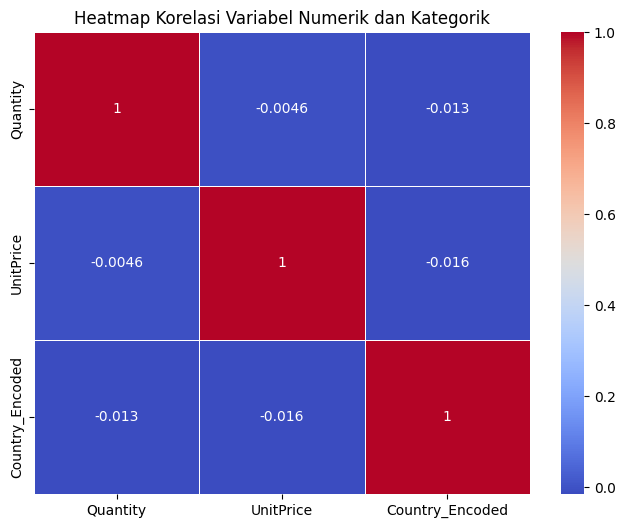

In [14]:
# Pilih kolom numerik dan Country yang sudah diencode
numerical_cols = ['Quantity', 'UnitPrice', 'Country_Encoded']

# Hitung korelasi menggunakan Pearson
correlation_matrix = df_corr[numerical_cols].corr()

# Visualisasi dengan Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap Korelasi Variabel Numerik dan Kategorik')
plt.show()


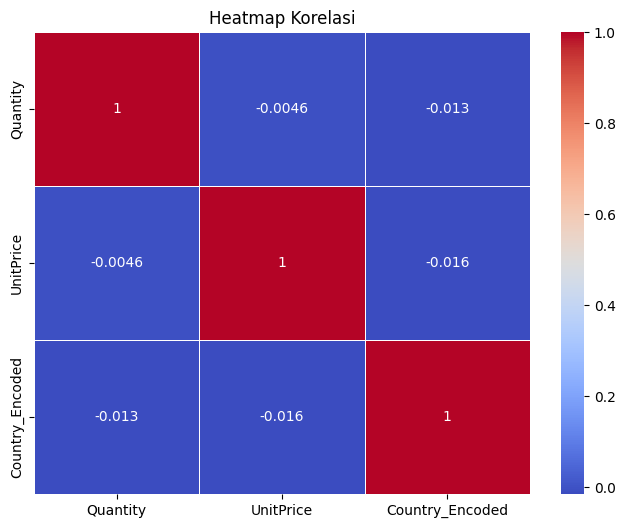

In [15]:
# Visualisasi heatmap korelasi
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap Korelasi')
plt.show()

## 4. Visualisasi Data

### Distribusi Variabel Numerik:

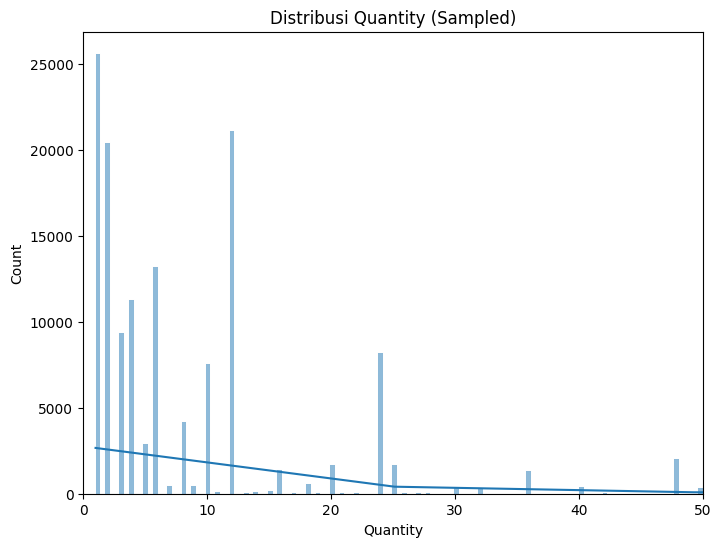

<Figure size 640x480 with 0 Axes>

In [16]:
# Sampling 35% data
sampled_df = dataset_ecommerce.sample(frac=0.35, random_state=42)

# Buat plot
fig, ax = plt.subplots(figsize=(8, 6))

# Histogram Quantity dengan batas X
sns.histplot(sampled_df['Quantity'], kde=True, ax=ax)
ax.set_title('Distribusi Quantity (Sampled)')
ax.set_xlim(0, 50)
plt.show()  # Batasi rentang X agar lebih terlihat jelas

plt.tight_layout()
plt.show()

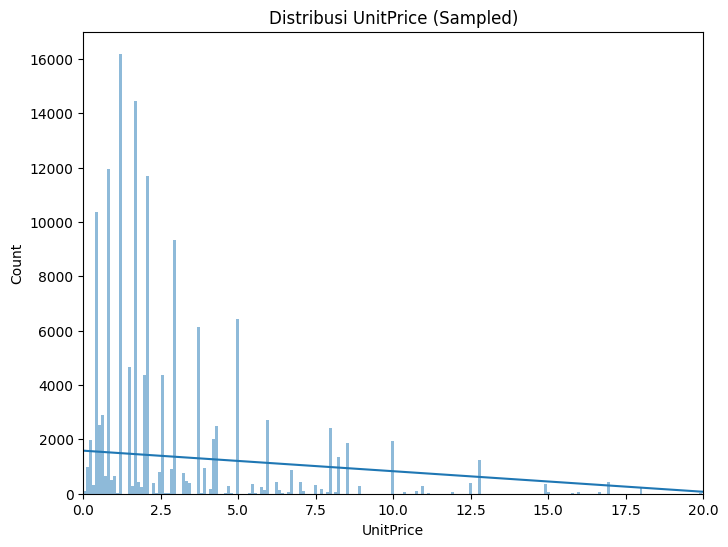

<Figure size 640x480 with 0 Axes>

In [17]:
# Buat plot
fig, ax = plt.subplots(figsize=(8, 6))

# Histogram UnitPrice dengan batas X
sns.histplot(sampled_df['UnitPrice'], kde=True, ax=ax)
ax.set_title('Distribusi UnitPrice (Sampled)')
ax.set_xlim(0, 20) # Batasi rentang X
plt.show()

plt.tight_layout()
plt.show()

### Pairplot untuk Melihat Hubungan Antar Variabel:

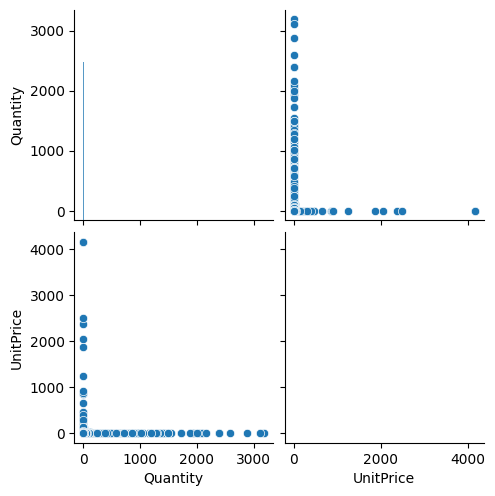

In [18]:
# Sampling 35% data agar pairplot tidak terlalu berat
sampled_df = dataset_ecommerce.sample(frac=0.35, random_state=40)

# Pairplot untuk fitur yang dipilih
sns.pairplot(sampled_df[['Quantity', 'UnitPrice','Country']])
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [19]:
# Drop kolom CustomerID dari dataset
dataset_ecommerce = dataset_ecommerce.drop('CustomerID', axis=1)

# Cek apakah CustomerID sudah terhapus
dataset_ecommerce.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,United Kingdom


## 1. Menghapus atau Menangani Data Kosong (Missing Values)

In [20]:
# Cek jumlah missing values
dataset_ecommerce.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
Country,0


In [21]:
# Isi nilai kosong di kolom Description dengan 'Unknown'
dataset_ecommerce['Description'] = dataset_ecommerce['Description'].fillna('Unknown')

## 2. Menghapus Data Duplikat

In [22]:
# Cek duplikasi
duplicates = dataset_ecommerce.duplicated()
print(f"Jumlah duplikasi: {duplicates.sum()}")

Jumlah duplikasi: 5192


In [23]:
# Hapus duplikasi
dataset_ecommerce = dataset_ecommerce.drop_duplicates()

## 3. Deteksi dan Penanganan Outlier

In [24]:
# Fungsi untuk menangani outlier dengan metode IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    # Terapkan pada kolom Quantity dan UnitPrice
dataset_ecommerce = remove_outliers(dataset_ecommerce, 'Quantity')
dataset_ecommerce = remove_outliers(dataset_ecommerce, 'UnitPrice')

In [25]:
before = dataset_ecommerce.shape[0]
dataset_ecommerce = remove_outliers(dataset_ecommerce, 'Quantity')
dataset_ecommerce = remove_outliers(dataset_ecommerce, 'UnitPrice')
after = dataset_ecommerce.shape[0]
print(f"Jumlah data sebelum outlier removal: {before}")
print(f"Jumlah data setelah outlier removal: {after}")
print(f"Jumlah outlier yang dihapus: {before - after}")

Jumlah data sebelum outlier removal: 333234
Jumlah data setelah outlier removal: 317994
Jumlah outlier yang dihapus: 15240


## 4. Pembuatan Fitur untuk Clustering

In [26]:
# Konversi InvoiceDate ke datetime
dataset_ecommerce['InvoiceDate'] = pd.to_datetime(dataset_ecommerce['InvoiceDate'])

# Snapshot date (satu hari setelah transaksi terakhir)
snapshot_date = dataset_ecommerce['InvoiceDate'].max() + pd.Timedelta(days=1)

# Buat RFM berbasis Country
rfm = dataset_ecommerce.groupby('Country').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',  # Frequency
    'Quantity': 'sum',  # Total Quantity
    'UnitPrice': 'mean'  # Avg Unit Price
}).rename(columns={
    'InvoiceDate': 'Recency',
    'InvoiceNo': 'Frequency',
    'Quantity': 'TotalQuantity',
    'UnitPrice': 'AvgUnitPrice'
})

# Buat fitur Monetary (Total Belanja)
dataset_ecommerce['Monetary'] = dataset_ecommerce['Quantity'] * dataset_ecommerce['UnitPrice']
monetary = dataset_ecommerce.groupby('Country')['Monetary'].sum()

# Gabungkan Monetary ke dalam RFM
rfm = rfm.merge(monetary, on='Country')

# Reset index
rfm.reset_index(inplace=True)

# Cek hasil RFM
rfm.head()


,Country,Recency,Frequency,TotalQuantity,AvgUnitPrice,Monetary
0,Australia,16,43,4822,2.454597,10187.79
1,Austria,2,17,3503,2.081988,5766.89
2,Bahrain,204,2,94,3.077273,248.30
3,Belgium,1,93,17626,2.060191,27035.26
4,Brazil,239,1,300,2.360526,690.00


Fitur yang dihasilkan:

Recency: Berapa hari sejak transaksi terakhir.

Frequency: Berapa kali pelanggan bertransaksi.

TotalQuantity: Total barang yang dibeli pelanggan.

AvgUnitPrice: Rata-rata harga barang yang dibeli pelanggan.

Monetary: Total uang yang dihabiskan pelanggan.


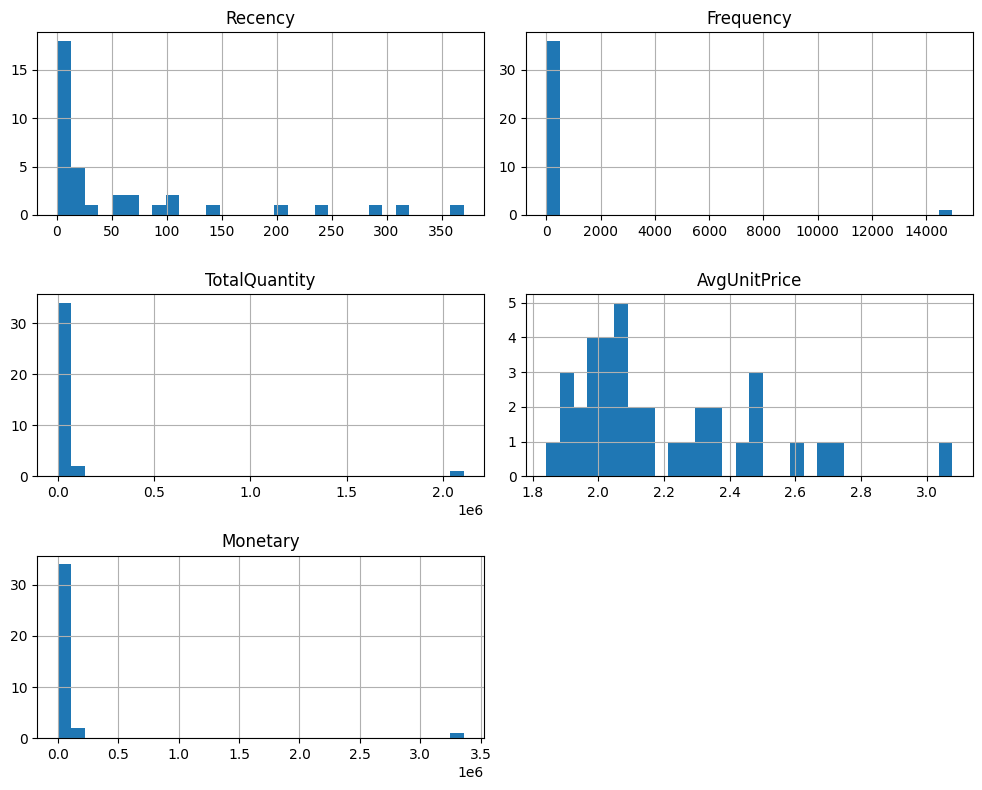

In [27]:
rfm.hist(figsize=(10, 8), bins=30)
plt.tight_layout()
plt.show()

##  5. Encoding Data Kategorikal

In [28]:
# Identifikasi semua kolom bertipe object
object_cols = dataset_ecommerce.select_dtypes(include='object').columns

# One-Hot Encoding untuk semua kolom object
dataset_ecommerce = pd.get_dummies(dataset_ecommerce, columns=object_cols, drop_first=True)

# Cek hasil
dataset_ecommerce.head()

,Quantity,InvoiceDate,UnitPrice,Monetary,InvoiceNo_536366,InvoiceNo_536367,InvoiceNo_536368,InvoiceNo_536370,InvoiceNo_536372,InvoiceNo_536373,...,Country_RSA,Country_Saudi Arabia,Country_Singapore,Country_Spain,Country_Sweden,Country_Switzerland,Country_USA,Country_United Arab Emirates,Country_United Kingdom,Country_Unspecified
0,6,2010-12-01 08:26:00,2.55,15.30,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,6,2010-12-01 08:26:00,3.39,20.34,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,8,2010-12-01 08:26:00,2.75,22.00,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,6,2010-12-01 08:26:00,3.39,20.34,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,6,2010-12-01 08:26:00,3.39,20.34,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [29]:
# Encoding Country
label_encoder = LabelEncoder()
rfm['Country_Encoded'] = label_encoder.fit_transform(rfm['Country'])

# Lihat hasil
rfm.head()

,Country,Recency,Frequency,TotalQuantity,AvgUnitPrice,Monetary,Country_Encoded
0,Australia,16,43,4822,2.454597,10187.79,0
1,Austria,2,17,3503,2.081988,5766.89,1
2,Bahrain,204,2,94,3.077273,248.30,2
3,Belgium,1,93,17626,2.060191,27035.26,3
4,Brazil,239,1,300,2.360526,690.00,4


## 6. Normalisasi atau Standarisasi Fitur

In [30]:
# Standarisasi data
scaler = StandardScaler()
scaled_rfm = scaler.fit_transform(rfm[['Recency', 'Frequency', 'TotalQuantity', 'AvgUnitPrice', 'Monetary', 'Country_Encoded']])

## 7. Feature Selection dengan Silhouette Score

In [31]:
# List kombinasi fitur untuk diuji
feature_combinations = [
    ['Recency', 'Frequency'],
    ['Recency', 'Monetary'],
    ['Frequency', 'TotalQuantity', 'AvgUnitPrice'],
    ['Recency', 'Frequency', 'Monetary'],
    ['Recency', 'Frequency', 'TotalQuantity', 'AvgUnitPrice'],
    ['Recency', 'Frequency', 'TotalQuantity', 'AvgUnitPrice', 'Monetary']
]

# Fungsi untuk uji kombinasi fitur
def test_combination(features):
    # Standarisasi data agar setiap fitur punya skala yang sama
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(rfm[features])

    # Cari jumlah klaster optimal (coba 2-10 klaster)
    best_score = -1
    best_k = 0
    for k in range(2, 11):
        kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
        labels = kmeans.fit_predict(scaled_data)
        score = silhouette_score(scaled_data, labels)

        # Simpan skor tertinggi
        if score > best_score:
            best_score = score
            best_k = k

    print(f"Fitur: {features} | Silhouette Score: {best_score:.2f} (Clusters: {best_k})")
    return best_score, best_k

# Uji semua kombinasi fitur
results = []
for features in feature_combinations:
    score, best_k = test_combination(features)
    results.append((features, score, best_k))

# Cari kombinasi fitur terbaik
best_result = max(results, key=lambda x: x[1])
print("\n🌟 Kombinasi Terbaik:", best_result)

Fitur: ['Recency', 'Frequency'] | Silhouette Score: 0.83 (Clusters: 2)
Fitur: ['Recency', 'Monetary'] | Silhouette Score: 0.83 (Clusters: 2)
Fitur: ['Frequency', 'TotalQuantity', 'AvgUnitPrice'] | Silhouette Score: 0.85 (Clusters: 2)
Fitur: ['Recency', 'Frequency', 'Monetary'] | Silhouette Score: 0.87 (Clusters: 2)
Fitur: ['Recency', 'Frequency', 'TotalQuantity', 'AvgUnitPrice'] | Silhouette Score: 0.80 (Clusters: 2)
Fitur: ['Recency', 'Frequency', 'TotalQuantity', 'AvgUnitPrice', 'Monetary'] | Silhouette Score: 0.83 (Clusters: 2)

🌟 Kombinasi Terbaik: (['Recency', 'Frequency', 'Monetary'], np.float64(0.8660502466922535), 2)


In [32]:
# Pilih fitur terbaik
best_features = ['Frequency', 'Recency','Monetary']

# Standarisasi data hanya dengan fitur terbaik
scaler = StandardScaler()
scaled_best_features = scaler.fit_transform(rfm[best_features])

# Clustering dengan jumlah cluster optimal (2 cluster)
kmeans_best = KMeans(n_clusters=2, random_state=42, n_init='auto')
labels_best = kmeans_best.fit_predict(scaled_best_features)

# Evaluasi silhouette score
score_best = silhouette_score(scaled_best_features, labels_best)
print(f"Silhouette Score (Fitur Terbaik): {score_best:.2f}")

# Tambahkan label cluster ke dalam dataframe RFM
rfm['Cluster'] = labels_best

# Lihat hasil clustering
rfm.head()

Silhouette Score (Fitur Terbaik): 0.87


,Country,Recency,Frequency,TotalQuantity,AvgUnitPrice,Monetary,Country_Encoded,Cluster
0,Australia,16,43,4822,2.454597,10187.79,0,0
1,Austria,2,17,3503,2.081988,5766.89,1,0
2,Bahrain,204,2,94,3.077273,248.30,2,0
3,Belgium,1,93,17626,2.060191,27035.26,3,0
4,Brazil,239,1,300,2.360526,690.00,4,0


In [33]:
# Perbaikan cluster_summary tanpa CustomerID
cluster_summary = rfm.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'TotalQuantity': 'mean',
    'AvgUnitPrice': 'mean',
    'Monetary': 'mean',
}).round(2)

# Tambahkan jumlah entri per cluster
cluster_summary['TransactionCount'] = rfm['Cluster'].value_counts().sort_index()

# Tampilkan hasil ringkasan
print("\nRingkasan Tiap Klaster:")
print(cluster_summary)


Ringkasan Tiap Klaster:
         Recency  Frequency  TotalQuantity  AvgUnitPrice    Monetary  \
Cluster                                                                
0          64.22      46.39        9796.31          2.20    15856.15   
1           1.00   14966.00     2105090.00          1.99  3357078.71   

         TransactionCount  
Cluster                    
0                      36  
1                       1  


Recency (R): Seberapa baru pelanggan bertransaksi (lebih kecil lebih baik).

Frequency (F): Seberapa sering pelanggan bertransaksi (lebih besar lebih baik).

Monetary (M): Total uang yang dibelanjakan (lebih besar lebih baik).


## 8. Evaluasi Akhir

In [34]:
# Inisialisasi dan fit model K-Means
optimal_k = 3  # Ganti dengan jumlah cluster optimal yang sudah kamu temukan
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init='auto')
rfm['Cluster'] = kmeans.fit_predict(scaled_rfm)

# Ambil posisi centroids setelah clustering
centroids = kmeans.cluster_centers_

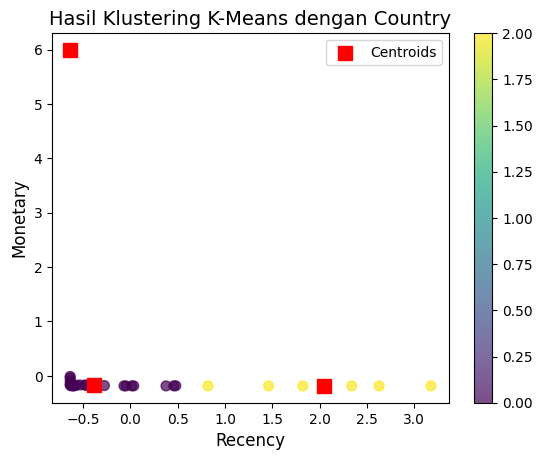

In [35]:
# Scatter plot hasil clustering
scatter = plt.scatter(scaled_rfm[:, 0], scaled_rfm[:, 1], c=rfm['Cluster'], cmap='viridis', s=50, alpha=0.7)

# Plot centroid dengan simbol kotak merah
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='s', s=100, label='Centroids')

# Tambahkan warna dan legenda
plt.colorbar(scatter)
plt.title('Hasil Klustering K-Means dengan Country', fontsize=14)
plt.xlabel('Recency', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.ylabel('Monetary', fontsize=12)
plt.legend()
plt.show()

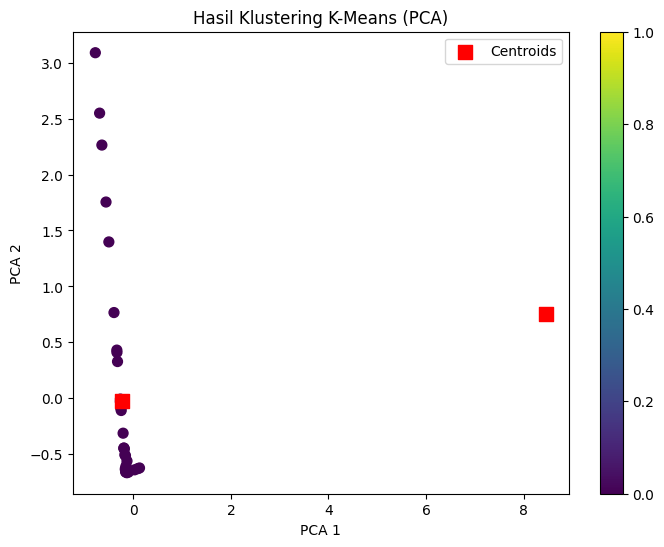

In [36]:
# Reduksi dimensi ke 2D
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_best_features)

# Visualisasi hasil PCA
plt.figure(figsize=(8, 6))
scatter = plt.scatter(pca_features[:, 0], pca_features[:, 1], c=labels_best, cmap='viridis', s=50)

# Plot centroid dalam ruang PCA
centroids_pca = pca.transform(kmeans_best.cluster_centers_)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], c='red', marker='s', s=100, label='Centroids')

plt.colorbar(scatter)
plt.title('Hasil Klustering K-Means (PCA)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.show()

<Figure size 1200x600 with 0 Axes>

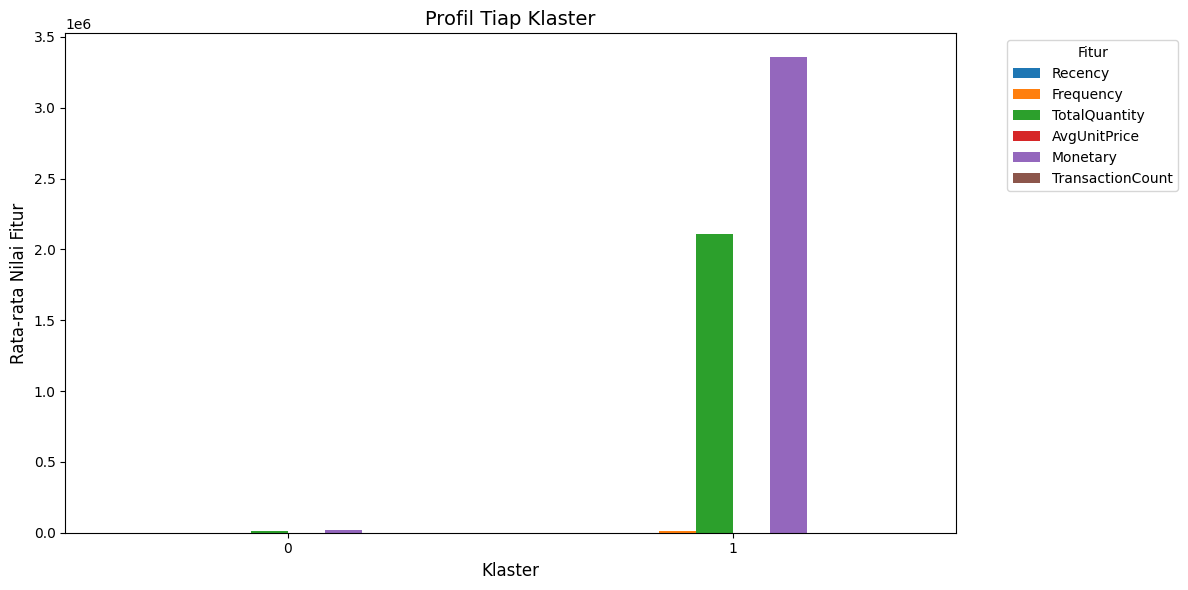

In [37]:
# Plot barplot untuk tiap fitur
plt.figure(figsize=(12, 6))
cluster_summary.plot(kind='bar', figsize=(12, 6))

# Tambahkan judul dan label
plt.title('Profil Tiap Klaster', fontsize=14)
plt.xlabel('Klaster', fontsize=12)
plt.ylabel('Rata-rata Nilai Fitur', fontsize=12)
plt.legend(title='Fitur', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)  # Agar label klaster horizontal

plt.tight_layout()
plt.show()

In [38]:
print("Centroid Tiap Cluster:")
print(pd.DataFrame(kmeans_best.cluster_centers_, columns=best_features))

Centroid Tiap Cluster:
   Frequency   Recency  Monetary
0  -0.166544  0.017645 -0.166409
1   5.995585 -0.635215  5.990711


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [39]:
# Pilih fitur yang akan digunakan
selected_features = ['Frequency', 'Recency','Monetary']

# Standarisasi fitur
scaler = StandardScaler()
scaled_rfm = scaler.fit_transform(rfm[selected_features])

# Inisialisasi model dengan jumlah cluster awal
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(scaled_rfm)

# Simpan hasil clustering ke dalam DataFrame
rfm['Cluster'] = labels

# Cek hasil clustering
rfm.head()


,Country,Recency,Frequency,TotalQuantity,AvgUnitPrice,Monetary,Country_Encoded,Cluster
0,Australia,16,43,4822,2.454597,10187.79,0,0
1,Austria,2,17,3503,2.081988,5766.89,1,0
2,Bahrain,204,2,94,3.077273,248.30,2,2
3,Belgium,1,93,17626,2.060191,27035.26,3,0
4,Brazil,239,1,300,2.360526,690.00,4,2


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

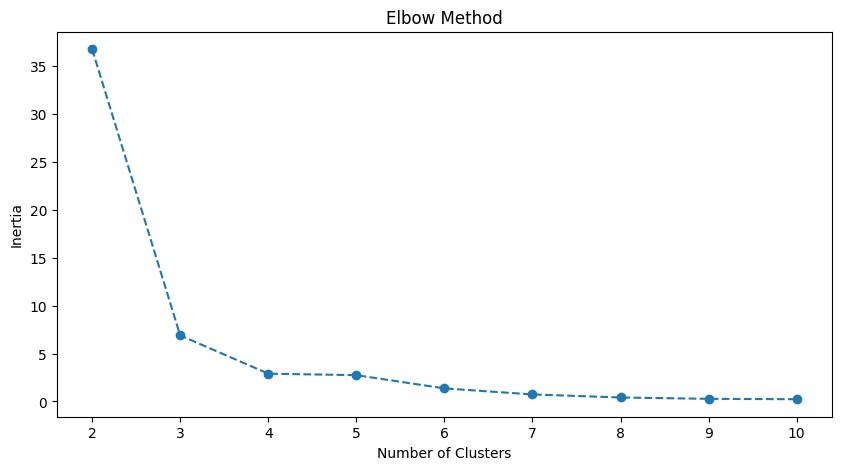

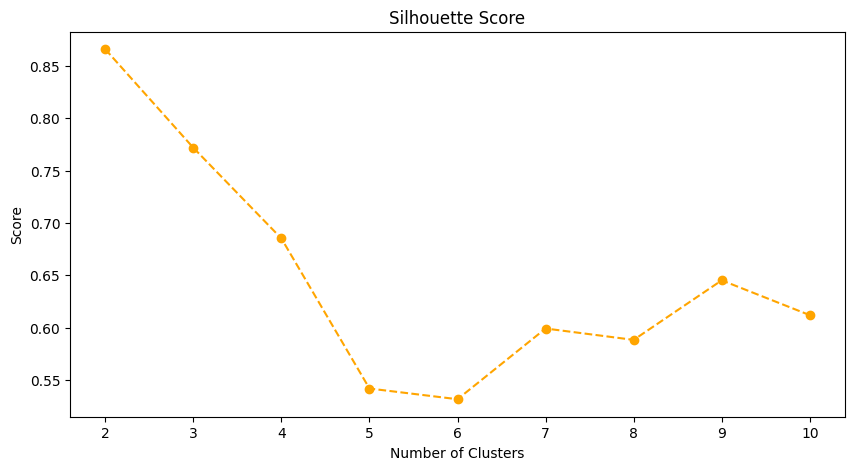

Jumlah Cluster Optimal: 2, Silhouette Score: 0.87


In [40]:
inertia = []
silhouette_scores = []

# Uji jumlah cluster dari 2 hingga 10
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    labels = kmeans.fit_predict(scaled_rfm)

    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(scaled_rfm, labels))

# Plot Elbow Method
plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), inertia, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Plot Silhouette Score
plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--', color='orange')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.show()

# Cek jumlah cluster optimal
best_k = silhouette_scores.index(max(silhouette_scores)) + 2
print(f"Jumlah Cluster Optimal: {best_k}, Silhouette Score: {max(silhouette_scores):.2f}")

In [41]:
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score

db_score = davies_bouldin_score(scaled_rfm, labels)
ch_score = calinski_harabasz_score(scaled_rfm, labels)

print(f"Davies-Bouldin Score: {db_score:.2f}")
print(f"Calinski-Harabasz Score: {ch_score:.2f}")

Davies-Bouldin Score: 0.26
Calinski-Harabasz Score: 1403.35


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [42]:
# Feature selection: Coba hanya pakai Recency, Frequency, dan Monetary
selected_features_opt = ['Recency', 'Frequency', 'Monetary']
scaled_rfm_opt = scaler.fit_transform(rfm[selected_features_opt])

# Clustering ulang
kmeans_opt = KMeans(n_clusters=best_k, random_state=42)
labels_opt = kmeans_opt.fit_predict(scaled_rfm_opt)

# Evaluasi dengan silhouette score
score_opt = silhouette_score(scaled_rfm_opt, labels_opt)
print(f"Silhouette Score setelah Feature Selection: {score_opt:.2f}")

Silhouette Score setelah Feature Selection: 0.87


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

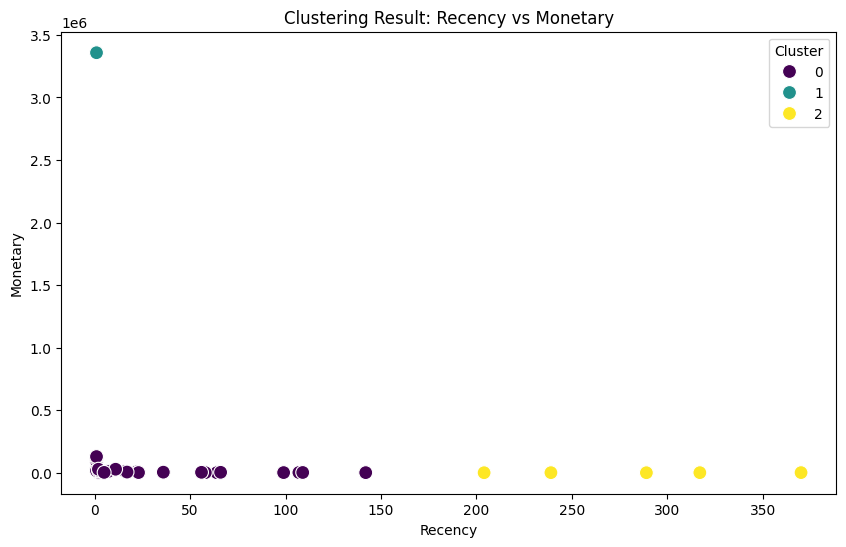

In [43]:
# Visualisasi clustering dengan scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=rfm, x='Recency', y='Monetary', hue='Cluster', palette='viridis', s=100)
plt.title('Clustering Result: Recency vs Monetary')
plt.xlabel('Recency')
plt.ylabel('Monetary')
plt.show()

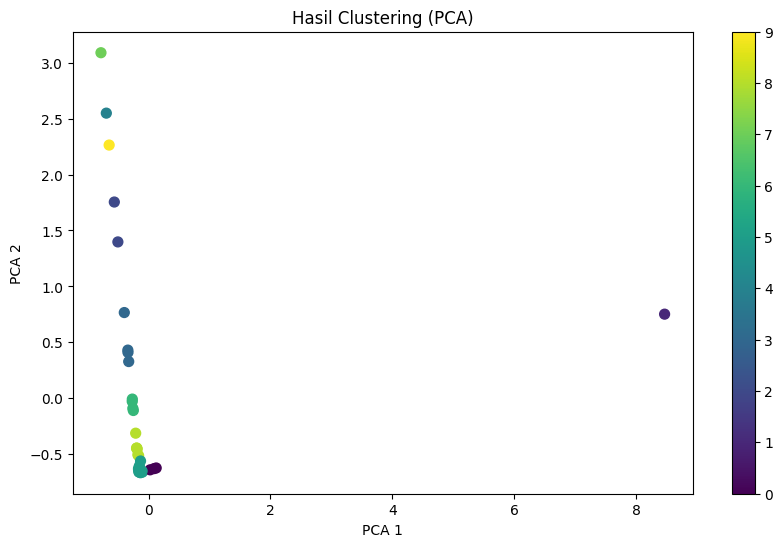

In [44]:
# Reduksi dimensi ke 2D untuk visualisasi
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_rfm)

# Visualisasi hasil clustering
plt.figure(figsize=(10, 6))
scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1], c=labels, cmap='viridis', s=50)
plt.colorbar(scatter)
plt.title('Hasil Clustering (PCA)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

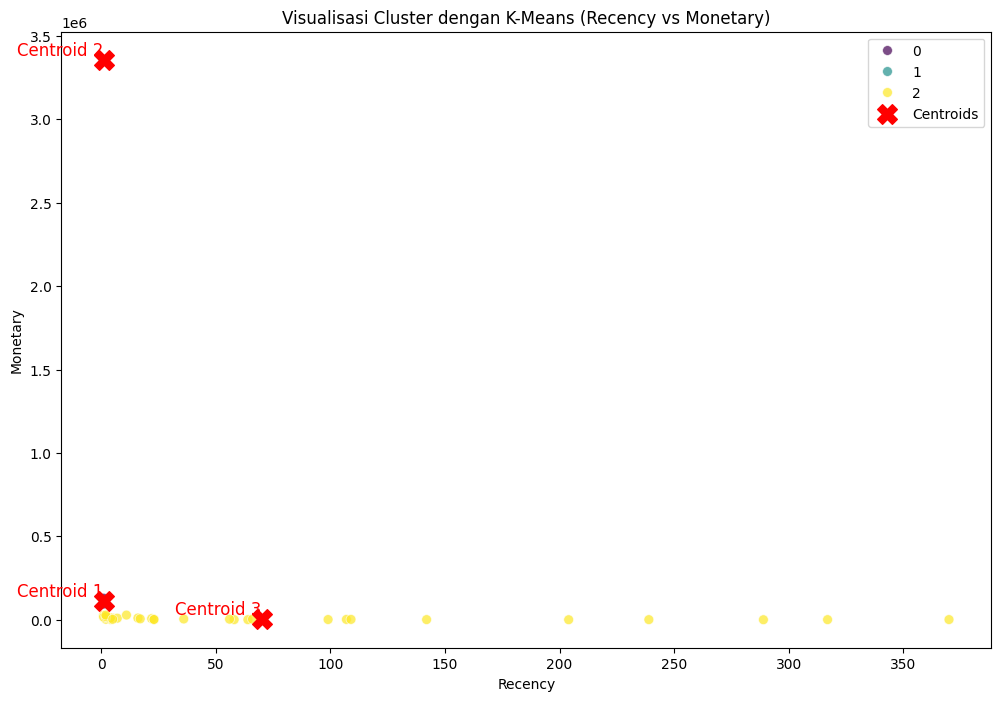

In [45]:
# Pilih jumlah cluster optimal (ganti dengan nilai yang kamu temukan sebelumnya)
optimal_k = 3

# Jalankan K-Means pada data mentah tanpa normalisasi
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
rfm["Cluster"] = kmeans.fit_predict(rfm[['Recency', 'Frequency', 'Monetary']])  # Tambahkan label cluster

# Ambil centroids (pusat cluster)
centroids = kmeans.cluster_centers_

# Pilih dua fitur utama untuk visualisasi
feature_x = "Recency"
feature_y = "Monetary"

# Visualisasi hasil clustering
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x=rfm[feature_x],
    y=rfm[feature_y],
    hue=rfm["Cluster"],
    palette="viridis",
    s=50,
    alpha=0.7,
    edgecolor='w'
)

# Tambahkan titik centroid
plt.scatter(centroids[:, 0], centroids[:, 2], c='red', s=200, marker='X', label='Centroids')

# Tambahkan label centroid
for i, centroid in enumerate(centroids):
    plt.text(centroid[0], centroid[2], f'Centroid {i+1}', fontsize=12, ha='right', va='bottom', color='red')

# Tambahkan label dan judul
plt.xlabel(feature_x)
plt.ylabel(feature_y)
plt.title(f'Visualisasi Cluster dengan K-Means ({feature_x} vs {feature_y})')

plt.legend()
plt.show()

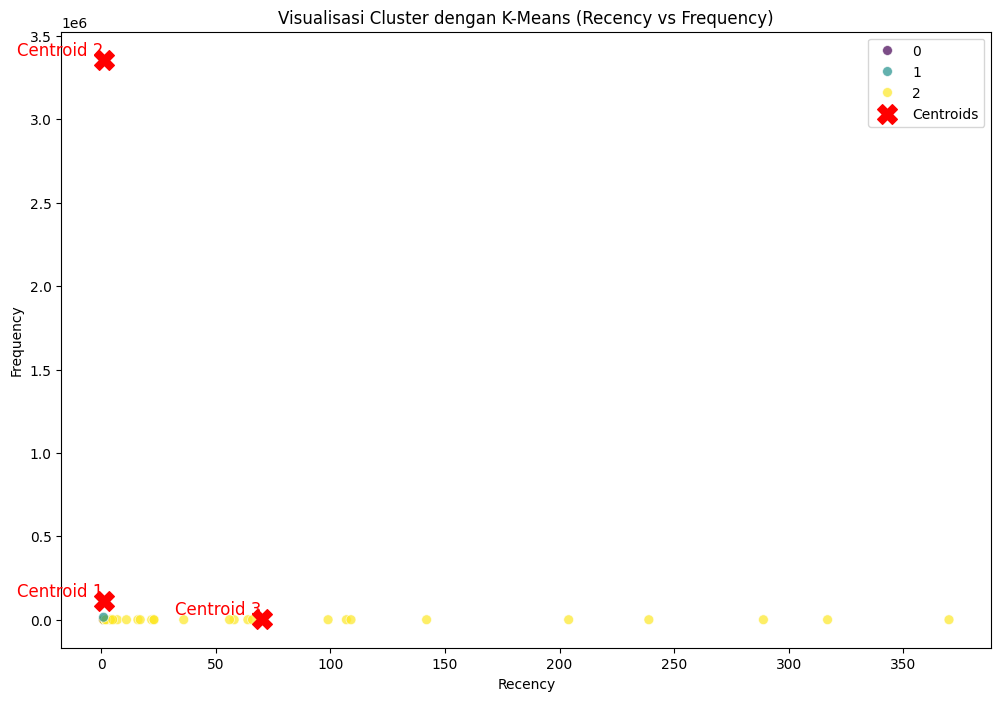

In [46]:
# Import library
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Pilih jumlah cluster optimal (ganti dengan nilai yang kamu temukan sebelumnya)
optimal_k = 3

# Jalankan K-Means pada data mentah tanpa normalisasi
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
rfm["Cluster"] = kmeans.fit_predict(rfm[['Recency', 'Frequency', 'Monetary']])  # Tambahkan label cluster

# Ambil centroids (pusat cluster)
centroids = kmeans.cluster_centers_

# Pilih dua fitur utama untuk visualisasi
feature_x = "Recency"
feature_y = "Frequency"

# Visualisasi hasil clustering
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x=rfm[feature_x],
    y=rfm[feature_y],
    hue=rfm["Cluster"],
    palette="viridis",
    s=50,
    alpha=0.7,
    edgecolor='w'
)

# Tambahkan titik centroid
plt.scatter(centroids[:, 0], centroids[:, 2], c='red', s=200, marker='X', label='Centroids')

# Tambahkan label centroid
for i, centroid in enumerate(centroids):
    plt.text(centroid[0], centroid[2], f'Centroid {i+1}', fontsize=12, ha='right', va='bottom', color='red')

# Tambahkan label dan judul
plt.xlabel(feature_x)
plt.ylabel(feature_y)
plt.title(f'Visualisasi Cluster dengan K-Means ({feature_x} vs {feature_y})')

plt.legend()
plt.show()


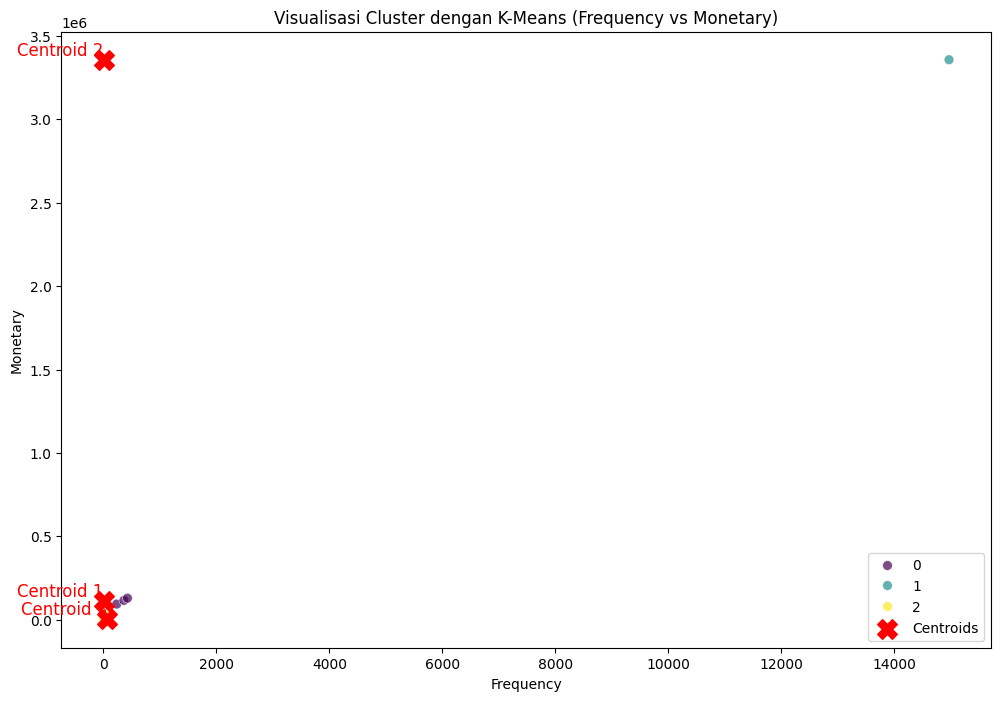

In [47]:
# Import library
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Pilih jumlah cluster optimal (ganti dengan nilai yang kamu temukan sebelumnya)
optimal_k = 3

# Jalankan K-Means pada data mentah tanpa normalisasi
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
rfm["Cluster"] = kmeans.fit_predict(rfm[['Recency', 'Frequency', 'Monetary']])  # Tambahkan label cluster

# Ambil centroids (pusat cluster)
centroids = kmeans.cluster_centers_

# Pilih dua fitur utama untuk visualisasi
feature_x = "Frequency"
feature_y = "Monetary"

# Visualisasi hasil clustering
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x=rfm[feature_x],
    y=rfm[feature_y],
    hue=rfm["Cluster"],
    palette="viridis",
    s=50,
    alpha=0.7,
    edgecolor='w'
)

# Tambahkan titik centroid
plt.scatter(centroids[:, 0], centroids[:, 2], c='red', s=200, marker='X', label='Centroids')

# Tambahkan label centroid
for i, centroid in enumerate(centroids):
    plt.text(centroid[0], centroid[2], f'Centroid {i+1}', fontsize=12, ha='right', va='bottom', color='red')

# Tambahkan label dan judul
plt.xlabel(feature_x)
plt.ylabel(feature_y)
plt.title(f'Visualisasi Cluster dengan K-Means ({feature_x} vs {feature_y})')

plt.legend()
plt.show()


## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [48]:
# Pilih fitur terbaik (yang menghasilkan silhouette score 0.93)
best_features = ['Recency', 'Frequency', 'Monetary']

# Standarisasi data pada fitur terbaik
scaler = StandardScaler()
scaled_best_features = scaler.fit_transform(rfm[best_features])

# Bangun model clustering dengan jumlah cluster optimal
best_k = 3  # Ganti dengan jumlah cluster optimal yang kamu temukan
kmeans = KMeans(n_clusters=best_k, random_state=42)
labels = kmeans.fit_predict(scaled_best_features)

# Buat DataFrame hasil normalisasi + cluster
df_normalized = pd.DataFrame(scaled_best_features, columns=best_features)
df_normalized['Cluster'] = labels

# Cek hasil
df_normalized.head()

,Recency,Frequency,Monetary,Cluster
0,-0.480319,-0.167944,-0.176854,0
1,-0.624889,-0.178682,-0.185001,0
2,1.461051,-0.184878,-0.195170,2
3,-0.635215,-0.147293,-0.145808,0
4,1.822476,-0.185291,-0.194356,2


In [49]:
# Inverse transform fitur terbaik
df_normalized[best_features] = scaler.inverse_transform(df_normalized[best_features])

# Cek hasil setelah inverse transform
df_normalized.head()

,Recency,Frequency,Monetary,Cluster
0,16.0,43.0,10187.79,0
1,2.0,17.0,5766.89,0
2,204.0,2.0,248.30,2
3,1.0,93.0,27035.26,0
4,239.0,1.0,690.00,2


In [50]:
# Buat DataFrame hasil inverse + cluster
df_original = rfm.copy()
df_original[best_features] = df_normalized[best_features]
df_original['Cluster'] = df_normalized['Cluster']

# Cek hasil gabungan
df_original.head()


,Country,Recency,Frequency,TotalQuantity,AvgUnitPrice,Monetary,Country_Encoded,Cluster
0,Australia,16.0,43.0,4822,2.454597,10187.79,0,0
1,Austria,2.0,17.0,3503,2.081988,5766.89,1,0
2,Bahrain,204.0,2.0,94,3.077273,248.30,2,2
3,Belgium,1.0,93.0,17626,2.060191,27035.26,3,0
4,Brazil,239.0,1.0,300,2.360526,690.00,4,2


### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [51]:
# Inverse Transform untuk data numerik
df_normalized[best_features] = scaler.inverse_transform(df_normalized[best_features])

# Cek hasil setelah inverse transform
df_normalized.head()


,Recency,Frequency,Monetary,Cluster
0,1611.935152,104560.270610,5.528612e+09,0
1,256.191218,41609.645640,3.129567e+09,0
2,19817.639400,5291.977389,1.348486e+08,2
3,159.352366,225619.164783,1.467106e+10,0
4,23206.999233,2870.799505,3.745416e+08,2


Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [52]:
# Gabungkan cluster dengan data asli
df_original = rfm.copy()
df_original[best_features] = df_normalized[best_features]
df_original['Cluster'] = df_normalized['Cluster']

# Analisis karakteristik tiap cluster (mean)
cluster_summary = df_original.groupby('Cluster')[best_features].mean().round(2)
cluster_summary

,Recency,Frequency,Monetary
Cluster,,,
0,2852.10,130256.00,9.942820e+09
1,159.35,36235797.83,1.821752e+12
2,27545.38,4323.51,3.076761e+08


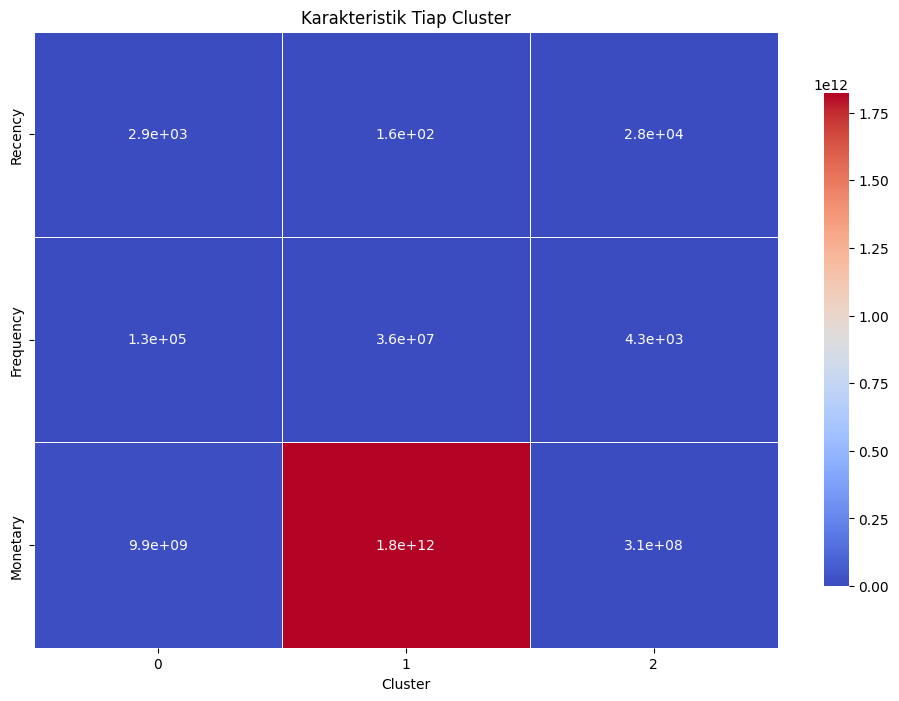

In [53]:
# Visualisasi perbandingan fitur antar cluster
plt.figure(figsize=(12, 8))
sns.heatmap(cluster_summary.T, annot=True, cmap='coolwarm', linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Karakteristik Tiap Cluster')
plt.show()

In [54]:
cluster_map = {
    0: 'Pelanggan Baru',
    1: 'Pelanggan Setia',
    2: 'Pelanggan Berisiko'
}
rfm['Cluster Label'] = rfm['Cluster'].map(cluster_map)

1. Cluster 1: Recency: 10.327,91 → Pelanggan di cluster ini sudah sangat lama     tidak berbelanja. Ini menunjukkan kelompok pelanggan yang hampir tidak aktif atau bahkan sudah berhenti berbelanja.
Frequency: 21,98 → Frekuensi belanja mereka sangat rendah, menandakan interaksi yang jarang dengan toko.
Monetary: 1.309.104,75 → Total belanja mereka cukup besar meskipun frekuensi rendah. Ini bisa berarti pelanggan yang hanya melakukan beberapa pembelian besar di masa lalu, lalu berhenti.

  Insight:
Cluster ini berisi pelanggan yang hampir hilang. Bisa dibuat strategi untuk re-engagement seperti email promosi khusus atau diskon untuk menarik mereka kembali.
Alternatifnya, bisa dianggap sebagai lost customers yang tidak perlu ditargetkan lagi.

2. Cluster 2:Recency: 292,29 → Pelanggan ini relatif baru berbelanja dibanding Cluster 0, tapi sudah cukup lama sejak transaksi terakhir mereka.
Frequency: 1042,29 → Ini adalah kelompok pelanggan yang sangat sering berbelanja, frekuensinya jauh lebih tinggi dibanding cluster lain.
Monetary: 95.737.980,73 → Pengeluaran mereka sangat besar, menunjukkan kelompok pelanggan high value atau bahkan mungkin reseller/grosir.

  Insight:
Cluster ini berisi pelanggan dengan frekuensi sangat tinggi dan pengeluaran besar. Mereka adalah pelanggan utama atau VIP yang perlu dipertahankan.
Bisa ditawarkan program loyalitas khusus, diskon eksklusif, atau early access untuk menjaga hubungan dengan mereka.

3. Cluster 3:Recency: 1572,32 → Pelanggan ini sudah cukup lama tidak berbelanja, tapi tidak selama Cluster 0.
Frequency: 103,94 → Frekuensi belanja mereka lumayan tinggi, menunjukkan mereka dulu sering berbelanja tetapi sekarang mulai menurun.
Monetary: 8.933.352,29 → Pengeluaran mereka juga cukup besar, meskipun tidak sebesar Cluster 1. Ini menandakan mereka pernah menjadi pelanggan aktif tapi mulai berkurang.

  Insight:
Cluster ini berisi pelanggan yang dulunya aktif, tapi sekarang mulai jarang belanja. Mereka bisa dianggap sebagai churn risk customers yang perlu diberikan insentif khusus untuk kembali aktif.
Strategi seperti pengingat produk favorit, voucher diskon personalisasi, atau email follow-up bisa diterapkan untuk mengaktifkan kembali pelanggan ini.

# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 1: Lost Customers
- **Rata-rata Recency:** 10.327,91 hari  
- **Rata-rata Frequency:** 21,98 transaksi
- **Rata-rata Frequency:** 21,98 transaksi
- **Analisis:** Cluster ini terdiri dari pelanggan yang sudah sangat lama tidak melakukan transaksi. Dengan recency yang tinggi (lebih dari 10.000 hari sejak transaksi terakhir), pelanggan di cluster ini bisa dianggap sebagai pelanggan yang tidak aktif atau sudah berhenti berbelanja.
Meski frekuensi belanja mereka rendah, total pengeluaran cukup besar, yang menunjukkan bahwa mereka pernah melakukan pembelian dalam jumlah besar di masa lalu, mungkin sebagai pembeli grosir.

  Strategi:
  Kirimkan email re-engagement atau voucher khusus untuk mencoba mengaktifkan kembali pelanggan ini.
  Jika tidak ada respons, pelanggan ini bisa dikelompokkan sebagai lost customers dan dikecualikan dari kampanye pemasaran selanjutnya.


## Cluster 2: VIP Customers
- **Rata-rata Recency:** 292,29 hari
- **Rata-rata Frequency:** 1.042,29 transaksi
- **Rata-rata Frequency:** £95.737.980,73
- **Analisis:** Pelanggan di cluster ini adalah pembeli paling aktif dengan frekuensi transaksi yang sangat tinggi. Meski sudah sekitar 292 hari sejak transaksi terakhir, mereka tetap menonjol karena total belanja mereka yang sangat besar, mencapai £95 juta.
Ini menunjukkan adanya kelompok pelanggan yang kemungkinan besar adalah wholesalers (pedagang grosir) atau VIP customers yang rutin membeli barang dalam jumlah besar.

  Strategi:
Tawarkan program loyalitas eksklusif seperti diskon khusus atau akses lebih awal ke produk baru.
Buat program personalized marketing untuk menjaga hubungan dengan mereka.
Jika ada program membership atau VIP, pelanggan di cluster ini sangat cocok untuk dimasukkan ke dalam kategori tersebut.


## Cluster 3: Churn Risk Customers
- **Rata-rata Recency:** 292,29 hari
- **Rata-rata Frequency:** 1.042,29 transaksi
- **Rata-rata Frequency:** £95.737.980,73
- **Analisis:** Cluster ini berisi pelanggan yang dulu pernah cukup sering berbelanja, tetapi belakangan ini mulai jarang bertransaksi. Dengan recency yang tinggi (lebih dari 1.500 hari sejak transaksi terakhir), pelanggan di cluster ini masuk kategori berisiko churn (berhenti berbelanja).
Meskipun frekuensi mereka cukup tinggi, total pengeluaran mereka lebih rendah dibandingkan Cluster 1. Ini menandakan mereka mungkin pernah menjadi pelanggan setia, tapi saat ini membutuhkan dorongan untuk kembali aktif.

  Strategi:
Berikan diskon personal atau program loyalitas untuk mendorong mereka kembali berbelanja.
Gunakan email pengingat produk favorit atau berikan penawaran eksklusif yang relevan dengan kebiasaan belanja mereka sebelumnya.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [55]:
# Simpan hasil clustering ke dalam file CSV
df_original.to_csv('hasil_clustering_ecommerce.csv', index=False)

print("✅ Data berhasil diekspor ke 'hasil_clustering_ecommerce.csv'")

✅ Data berhasil diekspor ke 'hasil_clustering_ecommerce.csv'


In [56]:
from google.colab import files
files.download('hasil_clustering_ecommerce.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>